In [1]:
!pip install control -q

# Importação das bibliotecas
import control as ct
import numpy as np
import matplotlib.pyplot as plt

# Configuração visual dos gráficos
plt.rcParams['figure.figsize'] = [10, 6] # Tamanho padrão das figuras
plt.rcParams['font.size'] = 12           # Tamanho da fonte
plt.style.use('seaborn-v0_8-whitegrid')  # Estilo de fundo com grade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 7.8 MB/s eta 0:00:00


TypeError: iter() returned non-iterator of type 'numpy.ndarray'

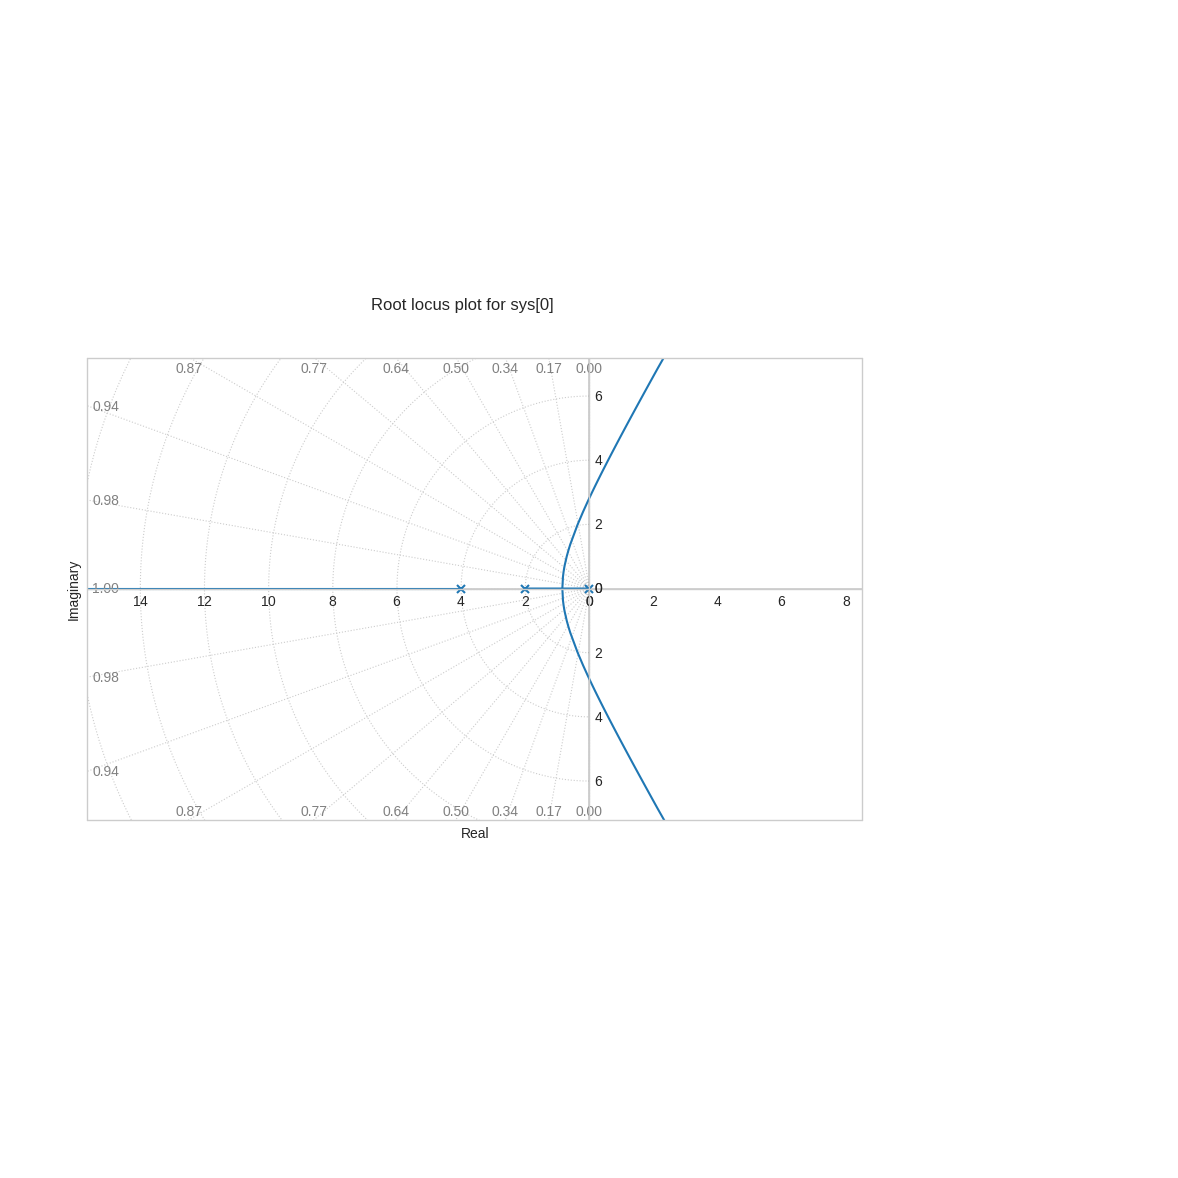

In [2]:
# --- Simulação 1: Lugar das Raízes de um Sistema de 3ª Ordem ---

# Sistema: G(s) = 1 / (s * (s+2) * (s+4))
num = [1]
den = [1, 6, 8, 0] # s^3 + 6s^2 + 8s + 0
sys = ct.tf(num, den)

plt.figure()

r, k = ct.root_locus(sys, grid=True)

plt.title('Lugar das Raízes: G(s) = 1 / [s(s+2)(s+4)]')
plt.xlabel('Eixo Real (σ)')
plt.ylabel('Eixo Imaginário (jω)')

# Marca os polos de malha aberta (K=0) com um 'x' vermelho
plt.plot([0, -2, -4], [0, 0, 0], 'rx', markersize=10, label='Polos Malha Aberta')
plt.legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/control/pzmap.py:381: UserWarning: axis already exists; grid keyword ignored
  warnings.warn("axis already exists; grid keyword ignored")


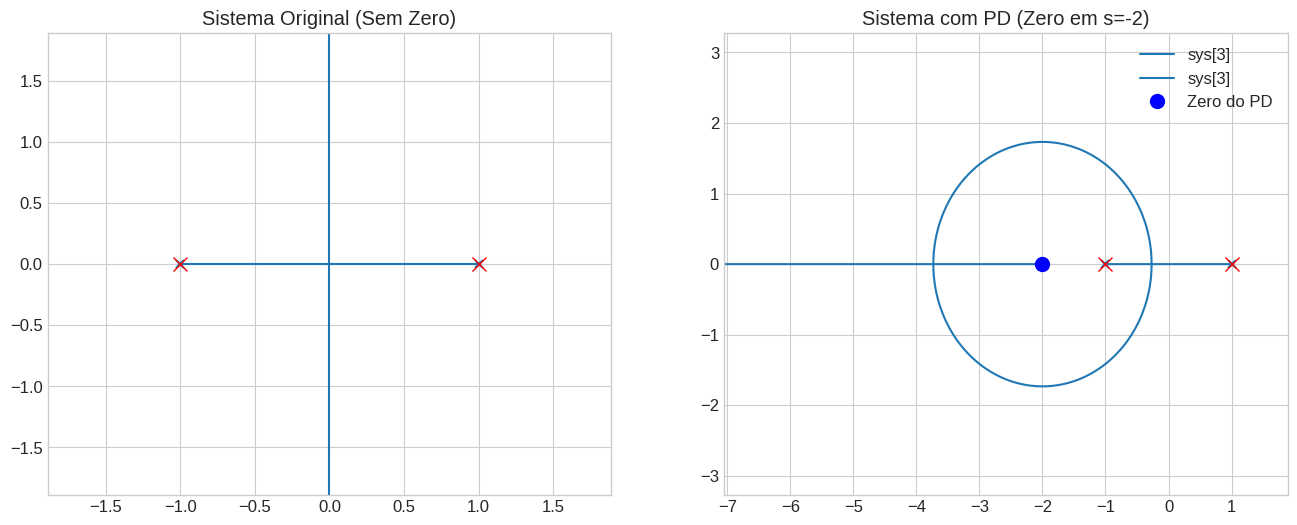

In [3]:
# --- Simulação 2: Estabilizando com um Zero (Controlador PD) ---

# Sistema Original Instável/Oscilatório: G(s) = 1 / (s^2 - 1)
# (Polos em +1 e -1 -> Instável em malha aberta)
sys_instavel = ct.tf([1], [1, 0, -1])

# Controlador PD: Adicionando um Zero em s = -2
zero_pos = 2
# O controlador PD ideal é Kp + Kd*s. Isso pode ser reescrito como Kd * (s + z).
# Aqui simulamos apenas a parte (s + 2) para ver o efeito geométrico.
ctrl_pd = ct.tf([1, zero_pos], [1])

# Sistema Compensado (Malha Aberta): L(s) = Gc(s) * G(s)
sys_compensado = ctrl_pd * sys_instavel

# Plotando lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Sistema Original
ct.root_locus(sys_instavel, ax=ax1, grid=True)
ax1.set_title('Sistema Original (Sem Zero)')
ax1.plot([-1, 1], [0, 0], 'rx', markersize=10)

# Gráfico 2: Sistema com PD
ct.root_locus(sys_compensado, ax=ax2, grid=True)
ax2.set_title(f'Sistema com PD (Zero em s=-{zero_pos})')
ax2.plot([-1, 1], [0, 0], 'rx', markersize=10) # Polos originais
ax2.plot([-zero_pos], [0], 'bo', markersize=10, label='Zero do PD') # Zero adicionado
ax2.legend()

plt.show()